<a href="https://colab.research.google.com/github/ioloi1128/CDA/blob/main/CDA_week3_ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

In [4]:
ds = xr.open_dataset("Elnino_sig.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Data variables:
    sst      (lat, lon) float32 ...

In [5]:
#ds['sst'].plot()

In [6]:
#ds['sst'].plot(cmap='jet', vmax=2)

In [7]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

!apt-get -V -y -qq install python-cartopy python3-cartopy
!pip uninstall shapely -y
!pip install shapely --no-binary shapely

zsh:1: command not found: apt-get
zsh:1: command not found: apt-get
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.3/987.3 kB 1.7 MB/s eta 0:00:00a 0:00:01
zsh:1: command not found: apt-get
Found existing installation: Shapely 1.8.4
Uninstalling Shapely-1.8.4:
  Successfully uninstalled Shapely-1.8.4
DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 789.9 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Cre

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import colorbar, colors
import matplotlib as mpl


/Users/wtseng/opt/anaconda3/envs/IPCS_1112_CDA_py310/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


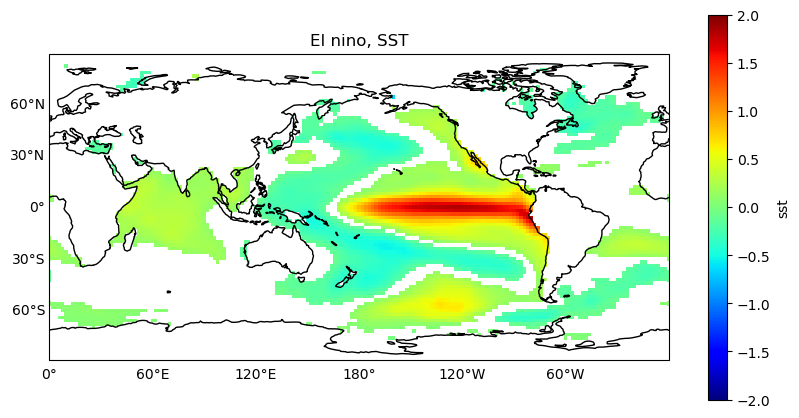

In [9]:
fig = plt.figure(figsize=[10,5])

cm=180
# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=cm))
#ax = fig.add_subplot(111, projection=ccrs.Robinson(central_longitude=cm))
#ax = fig.add_subplot(111, projection=ccrs.Mercator(central_longitude=cm))
#ax = fig.add_subplot(111, projection=ccrs.Orthographic(central_longitude=cm))


lats=ds['lat']
lons=ds['lon']
#clevels = [-2,-1.3,-0.2,0.2,1.3,2]
#clevels = np.arange(-2, 2, 0.2)


ds['sst'].plot(ax=ax, vmax=2, cmap='jet', transform=ccrs.PlateCarree())
#ds['sst'].plot(ax=ax, levels=clevels, cmap='PiYG', transform=ccrs.PlateCarree())



#select domain
#latS=-40
#latN=40
#lonL=100
#lonE=300
#ax.set_extent([lonL, lonE, latS, latN],crs=ccrs.PlateCarree())



ax.coastlines()
ax.set_title("El nino, SST")
#ax.stock_img() 

#ax.gridlines(draw_labels=True)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
#gl.ylabels_left = False
gl.xlines = False
gl.ylines = False
#gl.xlocator = mticker.FixedLocator([80, 0, -60])
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'}
#gl.ylabel_style = {'size': 15, 'color': 'gray'}
#gl.ylabel_style = {'color': 'blue', 'weight': 'bold'}




plt.show()